In [1]:
# pip install arabic-reshaper

In [2]:
# pip install python-bidi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display                                      
from arabic_reshaper import reshape  

In [4]:
data = pd.read_csv('digikala-orders_3.csv')
data.head(20)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,مشهد,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,اصفهان,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,تهران,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0


In [5]:
data['DateTime_CartFinalize']=pd.to_datetime(data['DateTime_CartFinalize'])
data['InvoiceYearMonth']=data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceYearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702


In [6]:
data_year_month = data.groupby(['InvoiceYearMonth'])['ID_Order'].count().reset_index()
data_year_month.head(10)

,InvoiceYearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
5,201402,148
6,201403,271
7,201404,267
8,201405,238
9,201406,293


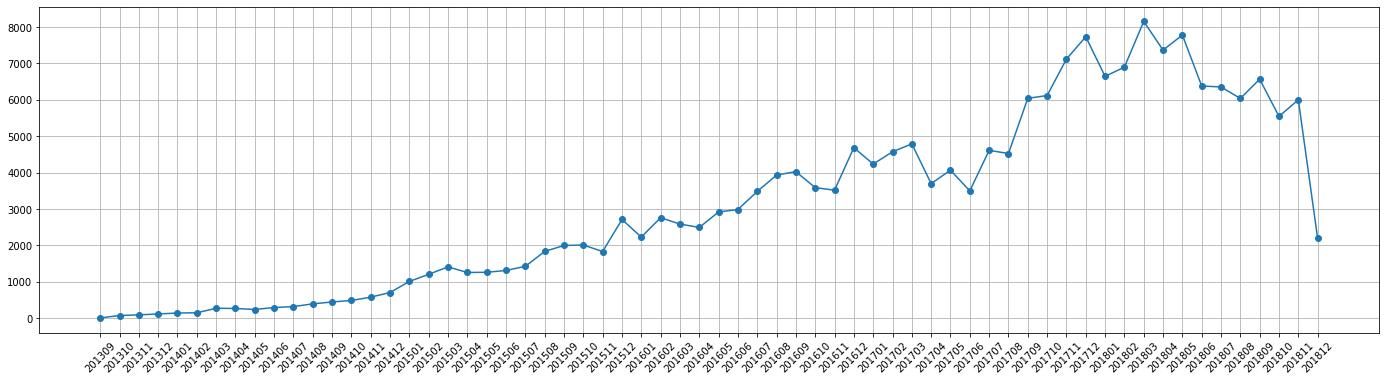

In [7]:
plt.figure(figsize=(24,6))
plt.grid()
plt.plot(data_year_month['InvoiceYearMonth'].to_numpy(dtype='str'), data_year_month['ID_Order'],marker ='o')
plt.xticks(rotation=45)
plt.show()

In [8]:
data_cities = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
data_cities

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [9]:
cities_with_more_costumer = data_cities.sort_values('ID_Customer', ascending=False)        
cities_with_more_costumer=cities_with_more_costumer[:5] 

cities_with_more_costumer

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353


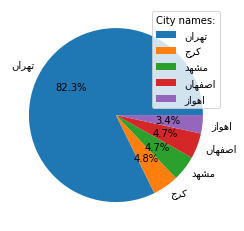

In [10]:
mylabels = cities_with_more_costumer['city_name_fa']
mylabels = [get_display(reshape(label)) for label in mylabels]

plt.pie(cities_with_more_costumer['ID_Customer'],labels=mylabels,autopct='%1.1f%%')

plt.legend(title = "City names:")
plt.show() 